In [55]:
#import the libraries

import pandas as pd
#pandas make the data frame

import numpy as np
#arrays

import seaborn as sns
import matplotlib.pyplot as plt
#perform vistalization

In [56]:
df=pd.read_csv("train_data.csv")

In [57]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [58]:
#know the data type of each coloumn
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

In [59]:
#Replacing question marks which are considered null values by real null values to facilitate replacing these values afterwards
df=df.replace(' ?', None)

In [60]:
#counting the numbers of missing values
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [61]:
#replacing the values to make the graph
df['Income ']=df['Income '].map({' <=50K':0 , ' >50K':1})
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


<Axes: xlabel='Income ', ylabel='count'>

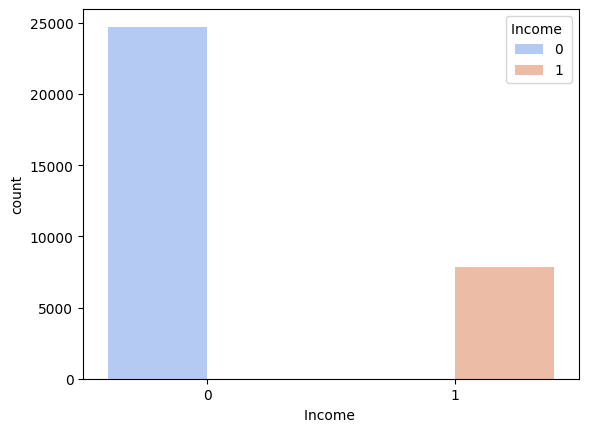

In [62]:
sns.countplot(x='Income ',hue='Income ',data=df,palette='coolwarm')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


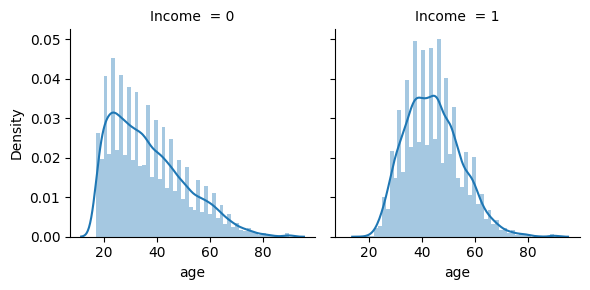

In [63]:
# age vs income
g = sns.FacetGrid(df, col='Income ')
g = g.map(sns.distplot, "age")

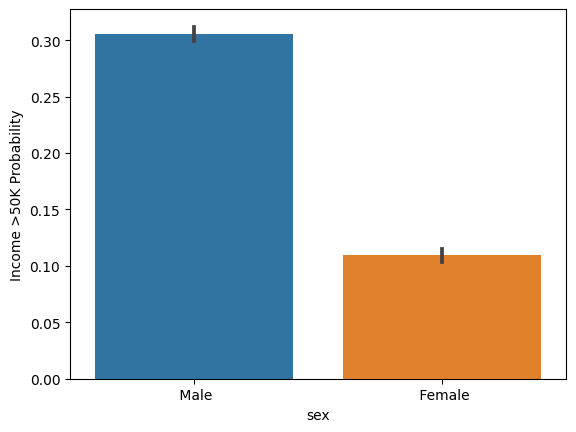

In [64]:
# sex vs income
s = sns.barplot(x="sex",y="Income ",data=df)
s = s.set_ylabel("Income >50K Probability")

In [65]:
#filling them with the mode

df['workclass']=df['workclass'].fillna(df['workclass'].mode())
df['native-country']=df['native-country'].fillna(df['native-country'].mode())
df['occupation']=df['occupation'].fillna(df['occupation'].mode())

In [66]:
#Dropping unneeded columns that won't critically affect model prediction
df = df.drop("sex",axis=1)
df = df.drop("age",axis=1)
df = df.drop("marital-status",axis=1)
df = df.drop("fnlwgt",axis=1)
df = df.drop("race",axis=1)
df = df.drop('native-country',axis = 1)

In [67]:
#Encoding categorical data using hot encoding (getting dummies)
one_hot_encoded_data = pd.get_dummies(df, columns = ['workclass','education','occupation','relationship'])

In [68]:
one_hot_encoded_data['workclass_ Private'].head(20)

0     0
1     0
2     1
3     1
4     1
5     1
6     1
7     0
8     1
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    0
17    1
18    1
19    0
Name: workclass_ Private, dtype: uint8

In [69]:
# separate the data into input feasure (X:all columns except the income) and output target (Y:the income column)
X = one_hot_encoded_data.drop('Income ', axis=1)
y = one_hot_encoded_data['Income ']

In [70]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import chi2, f_classif

In [71]:
#Selecting Features using chi square that depends on p-value
#no. of feasures is 5 , k-best :best feasures
FeatureSelection = GenericUnivariateSelect(score_func = chi2, mode='k_best', param=5) 
X = FeatureSelection.fit_transform(X, y)

In [72]:
#Printing columns names
for col in one_hot_encoded_data.columns:
    print(col)

education-num
capital-gain
capital-loss
hours-per-week
Income 
workclass_ Federal-gov
workclass_ Local-gov
workclass_ Never-worked
workclass_ Private
workclass_ Self-emp-inc
workclass_ Self-emp-not-inc
workclass_ State-gov
workclass_ Without-pay
education_ 10th
education_ 11th
education_ 12th
education_ 1st-4th
education_ 5th-6th
education_ 7th-8th
education_ 9th
education_ Assoc-acdm
education_ Assoc-voc
education_ Bachelors
education_ Doctorate
education_ HS-grad
education_ Masters
education_ Preschool
education_ Prof-school
education_ Some-college
occupation_ Adm-clerical
occupation_ Armed-Forces
occupation_ Craft-repair
occupation_ Exec-managerial
occupation_ Farming-fishing
occupation_ Handlers-cleaners
occupation_ Machine-op-inspct
occupation_ Other-service
occupation_ Priv-house-serv
occupation_ Prof-specialty
occupation_ Protective-serv
occupation_ Sales
occupation_ Tech-support
occupation_ Transport-moving
relationship_ Husband
relationship_ Not-in-family
relationship_ Other-r

In [73]:
# to know what are the five parameters it use
FeatureSelection.get_support()
# Features selected are: education-num, capital-gain, capital-loss, hours-per-week

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [75]:
# Splitting data into data for model training and data for the model to test on
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [76]:
# Create logistic regression model
model = LogisticRegression()

In [77]:
# Train the model on the training data
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

In [79]:
# Evaluation Phase

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

In [80]:
# We use pos_label to tell which class has the higher label value
# Precision & Recall
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)

In [81]:
f1 = f1_score(y_test, y_pred, pos_label=1)
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

In [82]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8398231175531261
Precision: 0.7236180904522613
Recall: 0.5230928905033732
F1-score: 0.6072289156626506
Confusion matrix:
 [[5829  385]
 [ 919 1008]]


In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
# Preprocess the data using StandardScaler (Solution for SVC not ending model training)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
from sklearn.svm import LinearSVC

In [86]:
# Create SVC model
model = SVC(kernel='linear') 
model.fit(X_train, y_train) 
# Use the model to make predictions on the testing data
y_pred = model.predict(X_test)

In [87]:
# Evaluation Phase

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# We use pos_label to tell which class has the higher label value
# Precision & Recall
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
# F1
f1 = f1_score(y_test, y_pred, pos_label=1)
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8411743029111902
Precision: 0.7416158536585366
Recall: 0.5049299429164504
F1-score: 0.6008027168879283
Confusion matrix:
 [[5875  339]
 [ 954  973]]


In [96]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create decision tree model
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

In [97]:
# Evaluation Phase

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)
# We use pos_label to tell which class has the higher label value
# Precision & Recall
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
# F1
f1 = f1_score(y_test, y_pred, pos_label=1)
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)

In [102]:

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8505476507319071
Precision: 0.7812911725955204
Recall: 0.5125324114088159
F1-score: 0.6189979123173278
Confusion matrix:
 [[7123  332]
 [1128 1186]]


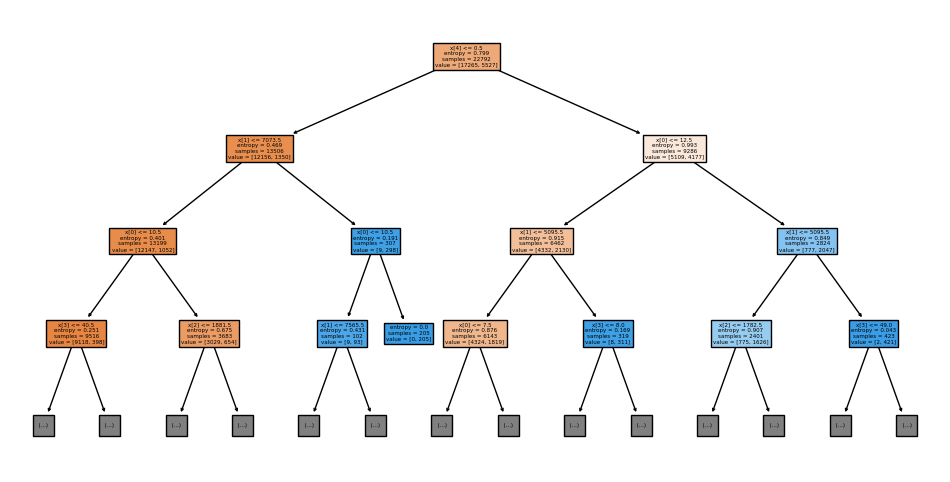

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(12, 6))
plot_tree(model, ax=ax, filled=True, max_depth=3)
plt.show()


In [107]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
params = {'max_depth': [3, 4, 5, 6, 7, 8],
          'min_samples_split': [2, 3, 4, 5],
          'min_samples_leaf': [1, 2, 3, 4]}

# Use GridSearchCV to search for best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Use the best hyperparameters to fit a new DecisionTreeClassifier object
model_best_params = DecisionTreeClassifier(**grid_search.best_params_)
model_best_params.fit(X_train, y_train)

# Make predictions on the iris dataset
y_pred = model_best_params.predict(X_test)

Best hyperparameters: {'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [108]:
# Evaluation phase :-
# We use pos_label to tell which class has the higher label value
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
confusion = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.8505476507319071
Precision: 0.8033783783783783
Recall: 0.513828867761452
F1-score: 0.6267791249341065
Confusion matrix:
 [[7164  291]
 [1125 1189]]
